# Which Feature indicates to higher Income level (>50k)

* age: age of the individual
* type_employer: type of employer the individual has
* fnlwgt: number of people the census takers believe that observation represents.
* education: highest level of education achieved for that individual
* education_num: highest level of education in numerical form
* marital: marital status of the individual
* occupation: occupation of the individual
* relationship: contains family relationship values like husband, father, and so on, but only contains one per observation
* race: descriptions of the individuals ethnicity
* sex: gender
* capital_gain: capital gains recorded
* capital_loss: capital losses recorded
* hr_per_week: hours worked per week
* country: country of origin for person
* income: (target) whether or not the person makes more than $50,000 per annum income.

* Importing all the neccessary Libraries for the analysis

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

* Importing the CSV file and replacing hypen with underscore and assigning new name to the column

In [67]:
new_cols = ["age","workclass", "fnlwgt","education","education_num","marital_status","occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"]
df = pd.read_csv("C:/Users/ROSHAN D K/Desktop/Python Projects/censusData.csv", names = new_cols, skiprows = 1, skipinitialspace = True)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


* Replacing the missing data from ? to np.nan so that we can access or delete all the empty records from the dataset

In [68]:
df.replace("?", np.nan, inplace = True) # replaced with null values

* Using Pivot for calculating final population

In [69]:
sex = df.pivot_table(index=['sex'], values=['fnlwgt'], aggfunc='sum')
workclass = df.pivot_table(index=['workclass'], values=['fnlwgt'], aggfunc='sum')
education = df.pivot_table(index=['education'], values=['fnlwgt'], aggfunc='sum')
marital_status = df.pivot_table(index=['marital_status'], values=['fnlwgt'], aggfunc='sum')
occupation = df.pivot_table(index=['occupation'], values=['fnlwgt'], aggfunc='sum')
native_country = df.pivot_table(index=['native_country'], values=['fnlwgt'], aggfunc='sum')
income = df.pivot_table(index=['income'], values=['fnlwgt'], aggfunc='sum')
age = df.pivot_table(index=['age'], values=['fnlwgt'], aggfunc='sum')
race = df.pivot_table(index=['race'], values=['fnlwgt'], aggfunc='sum')

# Exploring the dataset 

In [70]:
df.info

<bound method DataFrame.info of        age         workclass  fnlwgt   education  education_num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital_status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      

We have 15 columns and 32561 rows/records

In [71]:
df.shape

(32561, 15)

In [72]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [73]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Assigning education number to each education layer for better analysis

In [74]:
education_level = pd.DataFrame(df.groupby(['education','education_num'])[['education']].count().index.tolist())
education_level.columns = ['education','education_num']
education_level.sort_values(by='education_num')

,education,education_num
13,Preschool,1
3,1st-4th,2
4,5th-6th,3
5,7th-8th,4
6,9th,5
0,10th,6
1,11th,7
2,12th,8
11,HS-grad,9
15,Some-college,10


From the table below we can see that we have empty values in the 3 columns

In [75]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

-- Here, we are going to check which record has all 3 or 2 important feature empty

In [76]:
filt = ((df.native_country.isna()) & (df.occupation.isna()) & (df.workclass.isna()))
filt.sum()

27

Now this 27 records are complete useless for visualisation as it does not contain most of the important feature. 

In [77]:
filt = ((df.workclass.isna()) & (df.occupation.isna()))
filt.sum()

1836

Again here this two variable can be a important feature for my analysis which is missing so I need to remove this records too. Or Try to find the missing values.

In [78]:
filt = ((df.native_country.isna()) | (df.occupation.isna()) | (df.workclass.isna()))
filt.sum()

2399

Now, this number of records have either one or more number of missing values. 
All of these variables are categorical data type. So, I could impute the missing values with the most frequent value which is mode.

Distribution of Missing values in the dataset   
It seems like we have majority of the data present and small percentage is missing

C:\Users\ROSHAN D K\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1616: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


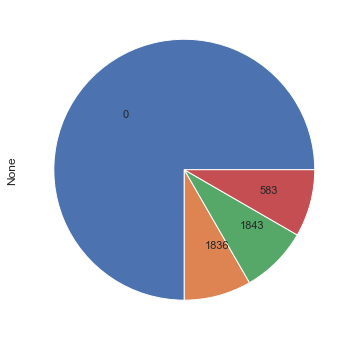

In [104]:
# pie chart for proportion of missing values and present values and some suggestion to deal with that missing values
ol = df.isna().sum().value_counts(normalize = True)
ol.plot(kind='pie', figsize=(10,6),
        pctdistance=1.25, labeldistance=.6);

Now, we are going to segregate columns into categorical and numerical variable

In [80]:
categ = df[["workclass","education",'marital_status','occupation','relationship','race', 'sex', 'income', 'native_country']]
numeric = df[['age','fnlwgt', 'education_num','capital_gain', 'capital_loss', 'hours_per_week']]
for i, col in enumerate(categ.columns):
  print(categ.columns[i].upper(), '\n', categ[str(col)].unique(), '\n')

WORKCLASS 
 ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

EDUCATION 
 ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

MARITAL_STATUS 
 ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 

OCCUPATION 
 ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv'] 

RELATIONSHIP 
 ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 

RACE 
 ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other'] 

SEX 
 ['Male' 'Female'] 

INCOME 
 ['<=50K' '>50K'] 

NATIVE_COUNTRY 
 ['United-States' 'Cuba' 'Jamaica' 'India' nan 'Mex

In [81]:
categ.nunique() # Number of subcategories in each column represented here

workclass          8
education         16
marital_status     7
occupation        14
relationship       6
race               5
sex                2
income             2
native_country    41
dtype: int64

Exploring the missing values to get better understanding of what we are dealing with  
NA - workclass, occupation, native country

In [82]:
country = df['native_country'].isna() # missing values
df.loc[country]
workc = df['workclass'].isna() # missing values
df.loc[workc]
occu = df['occupation'].isna() # missing values
df.loc[occu]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
69,25,NaN,200681,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,NaN,212759,10th,6,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,<=50K
106,17,NaN,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
32531,30,NaN,33811,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
32541,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


# Data cleaning process
I am going to drop the column name capital gain, capital looses and relationship because it doesnt align with my reserach

In [83]:
colsn = df[['relationship', 'capital_gain', 'capital_loss']]
df.drop(colsn, axis = 1, inplace = True)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,race,sex,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,40,Cuba,<=50K


# Feature Engineering
Now we are going to reduce the categories to visulaise only variables which is relevant to our research

For workclass :- government job : State-gov, Federal-gov, Local-gov
self employed: Self-emp-not-inc, Self-emp-inc,
private:  / other: Without-pay, Never-worked 

Education :- Masters and PhD - Masters, Doctorate, Prof-school
Undergrad - Bachelors, HS-grad , Assoc-acdm, Assoc-voc, Some-college
Primary education - Some-college, 5th-6th', ' 10th', ' 1st-4th',' Preschool', ' 12th' 11th, 9th
others

relationship :- Married : Married-civ-spouse, Married-AF-spouse
Single : Never-married, Widowed , Married-spouse-absent
Divorced : Divorced, Separated

Race :- white, Black, Asian
Other:' Amer-Indian-Eskimo', Other

I can also apply binning method on the numerical variable like age
age - 0-18 - (child)
19-60 - middle age
61+ - senior citizen

hours/week
below 40 hours - part time
40 hours - full time
40+ - overtime

In [84]:
df3 = pd.read_csv("C:/Users/ROSHAN D K/Desktop/Python Projects/censusData.csv", names = new_cols, skiprows = 1, skipinitialspace = True)
df3['sex'].replace({'Male':0, 'Female':1}, inplace = True)
df3['marital_status'].replace({"Married-civ-spouse":"Married",'Never-married':'Single','Separated':'Divorced','Widowed':'Single','Married-spouse-absent':'Single','Married-AF-spouse':'Married'},inplace = True)
df3['education'].replace({'Preschool':'Primary education','1st-4th':'Primary education','5th-6th':'Primary education','7th-8th':'Primary education','9th':'Primary education','10th':'Primary education','11th':'Primary education','12th':'Primary education','HS-grad':'Undergrad',
        'Prof-school':'Masters and PhD','Assoc-acdm':'Undergrad','Assoc-voc':'Undergrad','Some-college':'Undergrad',
        'Bachelors':'Undergrad','Masters':'Masters and PhD','Doctorate':'Masters and PhD'}, inplace = True)
df3['race'].replace({' Asian-Pac-Islander':'Other', 'Amer-Indian-Eskimo':'Other'}, inplace = True)
df3.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Undergrad,13,Single,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Undergrad,13,Married,Exec-managerial,Husband,White,0,0,0,13,United-States,<=50K
2,38,Private,215646,Undergrad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,<=50K
3,53,Private,234721,Primary education,7,Married,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,<=50K
4,28,Private,338409,Undergrad,13,Married,Prof-specialty,Wife,Black,1,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters and PhD,14,Married,Exec-managerial,Wife,White,1,0,0,40,United-States,<=50K
6,49,Private,160187,Primary education,5,Single,Other-service,Not-in-family,Black,1,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,Undergrad,9,Married,Exec-managerial,Husband,White,0,0,0,45,United-States,>50K
8,31,Private,45781,Masters and PhD,14,Single,Prof-specialty,Not-in-family,White,1,14084,0,50,United-States,>50K
9,42,Private,159449,Undergrad,13,Married,Exec-managerial,Husband,White,0,5178,0,40,United-States,>50K


In [85]:
df3.nunique()

age                  73
workclass             9
fnlwgt            21648
education             3
education_num        16
marital_status        3
occupation           15
relationship          6
race                  4
sex                   2
capital_gain        119
capital_loss         92
hours_per_week       94
native_country       42
income                2
dtype: int64

As we can see after applying feature engineering multiple subcategories have been combine together for better visualisation and for model building

# Visualisation

In [86]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(10,6)})

* Checking the Data Distribution of Independent and dependent variable

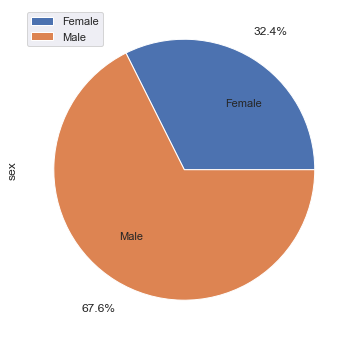

In [87]:
ex = sex
ex.plot(kind='pie', figsize=(10,6), autopct='%1.1f%%',
       pctdistance=1.25, labeldistance=.6,subplots=True);
plt.ylabel('sex');

Observation - from the output it is clear that we have male proportion twice of the female proportion in the dataset, which means dataset is not a proper representation of sex.     
so either we have to balance the dataset by making them even or use the mode method to fill the missing values. 

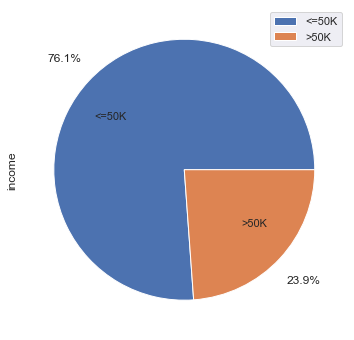

In [88]:
ola = income
ax = ola.plot(kind='pie', figsize=(10,6), autopct='%1.1f%%',
       pctdistance=1.25, labeldistance=.6,subplots=True)
plt.ylabel('income');

Observation - In this we can observe that there are more than 76% of the people who earns less than 50K while only 23% people earn above 50k.

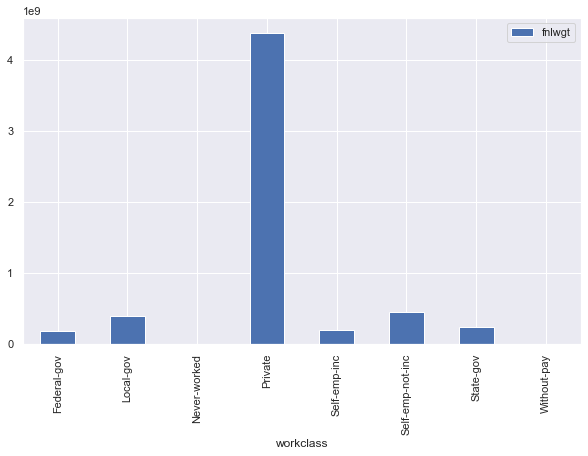

In [89]:
stats = workclass
ax = stats.plot(kind='bar');

Observation - People working in the private companies have dominated whereas people working in the governmenet job are less compared to people working in the private companies  

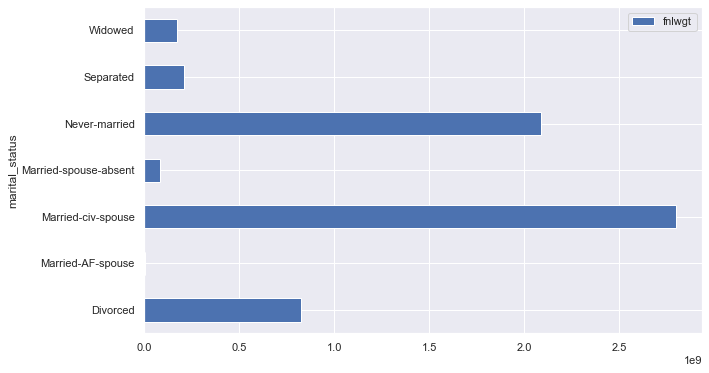

In [90]:
edu = marital_status
edu.plot(kind='barh');

Observation - People who 'never married' or 'married with civil spouse' Or 'Divorced' people constitute of majority of the population in the dataset.

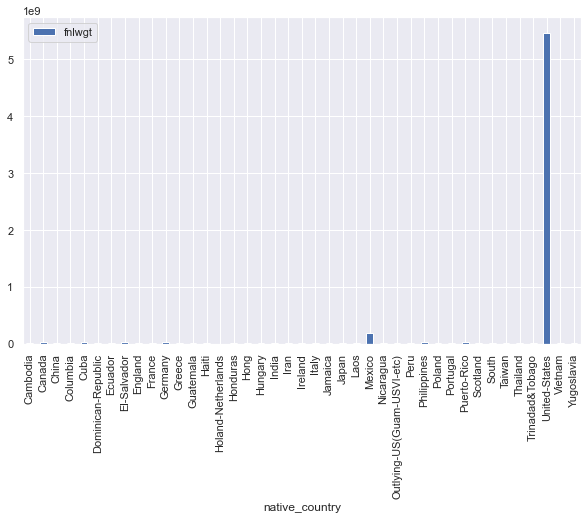

In [91]:
edu = native_country
edu.plot(kind='bar');

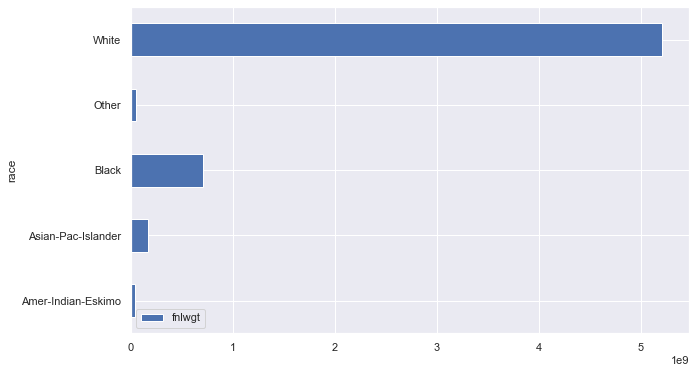

In [92]:
sex_a = race
ax = sex_a.plot(kind='barh')

Observation - From the above chart we can see most of the people are american which make sense that majority of the people falls in white racial group.

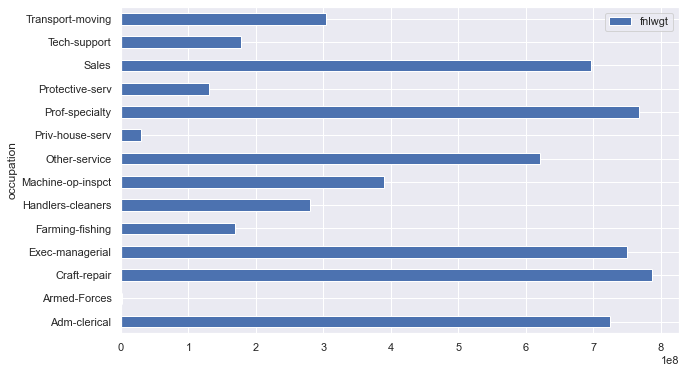

In [93]:
sex_a = occupation
ax = sex_a.plot(kind='barh')

# Bivariate Distribution

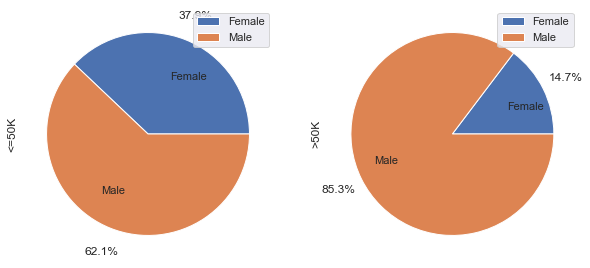

In [94]:
k = df.groupby(['sex', 'income'])['fnlwgt'].aggregate('sum').unstack()
k.plot(kind='pie', figsize=(10,6), autopct='%1.1f%%',
       pctdistance=1.25, labeldistance=.6,subplots=True);

Observation - proportion of women earning less than 50k salary are twice as compared to female who is earning more than 50k salary.      
Male have dominated the chart of higher salary bracket with more than 85% population.     

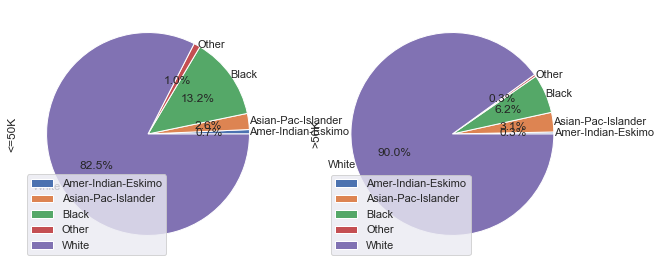

In [95]:
m = df.groupby(['race', 'income'])['fnlwgt'].aggregate('sum').unstack()
m.plot(kind='pie', figsize=(10,6), autopct='%1.1f%%',
       pctdistance=0.6, labeldistance=1,subplots=True);

Observation - proportion of the black people in the higher salary bracket is half when compared to people with black ethnicity who has salary less than 50k.

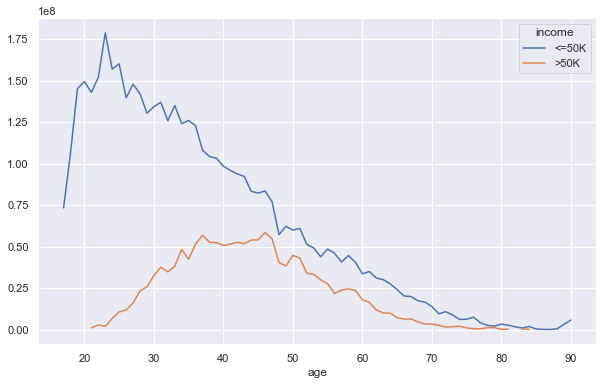

In [96]:
m = df.groupby(['age', 'income'])['fnlwgt'].aggregate('sum').unstack()
m.plot();

Observation - In general, people between the age of 20 and 30 are in majority who earns less than 50k wheras people between the age of 35 to 45 are the majority who earns more than 50k.

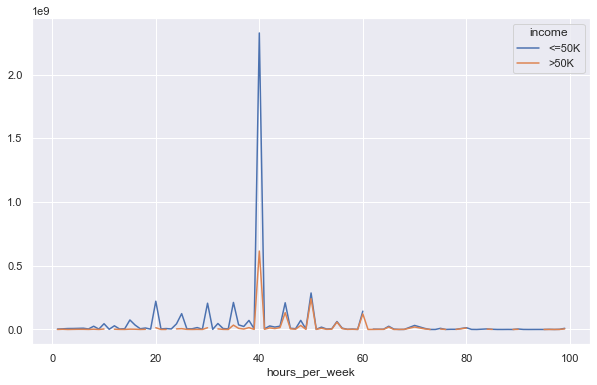

In [97]:
m = df.groupby(['hours_per_week', 'income'])['fnlwgt'].aggregate('sum').unstack()
m.plot();

Observation - Its a clear trend majority of the people prefer to work for full time which is close to 40hours.

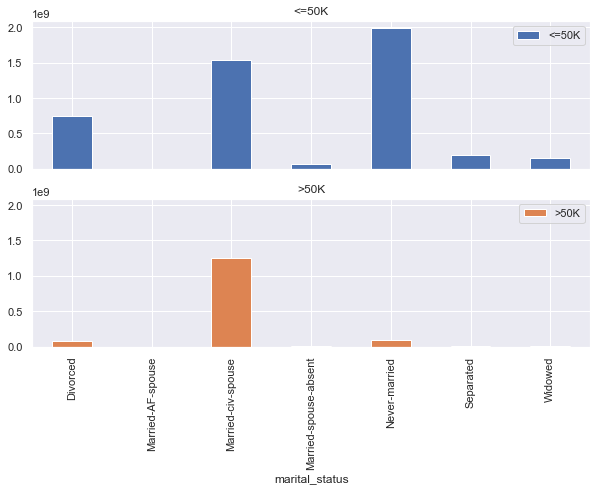

In [98]:
ok = df.groupby(['marital_status', 'income'])['fnlwgt'].aggregate('sum').unstack()
ok.plot(kind='bar',subplots=True,sharey='row');

Observation - According to the graph people who are married with civil spouses shows a strong correlations to higher income level as compared to other categories whereas people who were never married seems to have higher proportion of people with lower income level. 

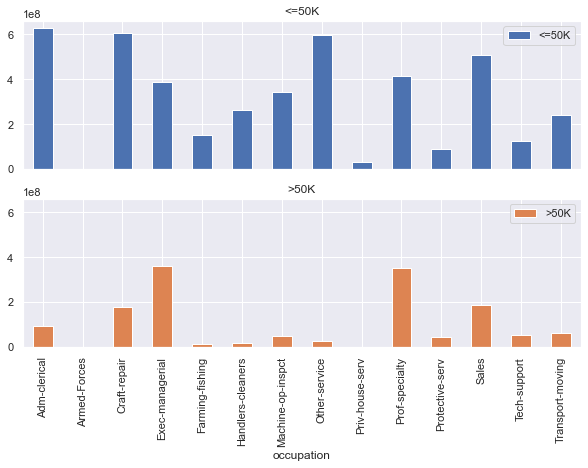

In [99]:
ko = df.groupby(['occupation', 'income'])['fnlwgt'].aggregate('sum').unstack()
ko.plot(kind='bar',subplots=True,sharey='row');

Observation - In general, proportion of people with lower than 50K salary are more    
-- people with the occupation of adm-clerical, craft repair and other services have dominated the chart of lower than 50k salary.   
-- Also people with occupation of excecutive managerial role and proffesional speciality has dominated the chart for higher than 50k salary bracket.

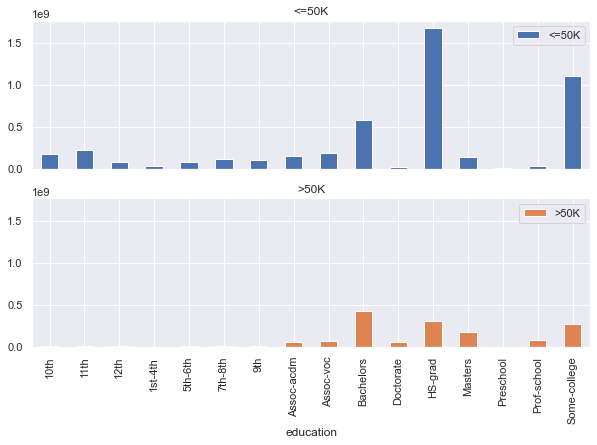

In [100]:
koo = df.groupby(['education', 'income'])['fnlwgt'].aggregate('sum').unstack()
koo.plot(kind='bar',subplots=True, sharey='row');

observation - people who have studied below 12th class are hardly exist in the earning bracket of more than 50k. And people with the doctorate and masters are slightly higher in proportion who are earning more than 50k salary. 

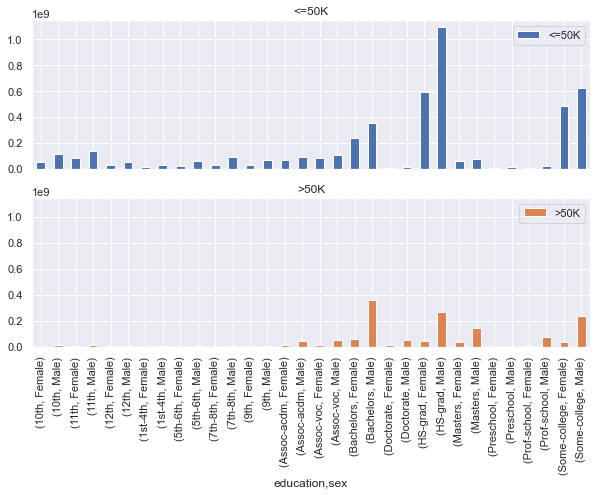

In [101]:
kro = df.groupby(['education', 'sex','income'])['fnlwgt'].aggregate('sum').unstack()
kro.plot(kind='bar',subplots=True, sharey='row');

Observation - Majority of male population with the undergraduate degree who is earnings more than 50k salary are 3 times more than the female proportion. similar trend is visible for female with the masters and doctorate degree, they are lower in proportion as compared to male.  

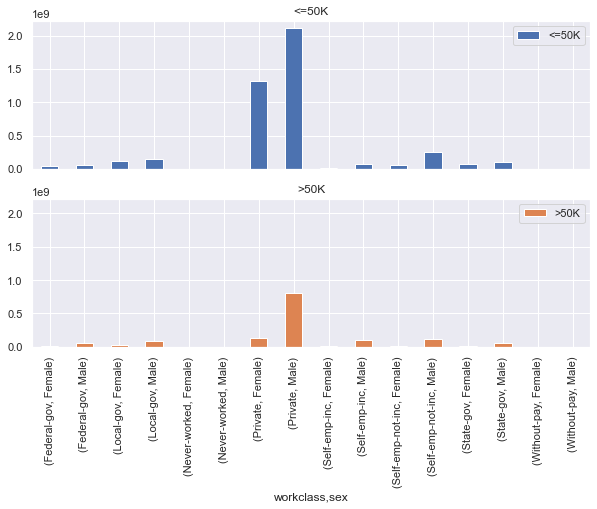

In [102]:
kko = df.groupby(['workclass','sex','income'])['fnlwgt'].aggregate('sum').unstack()
kko.plot(kind='bar',subplots=True,sharey='row');

Observation - Number suggest that female working in private companies and earnings more than 50k salary are 3 times less than their male colleague. And similar trend is observed even in government jobs.

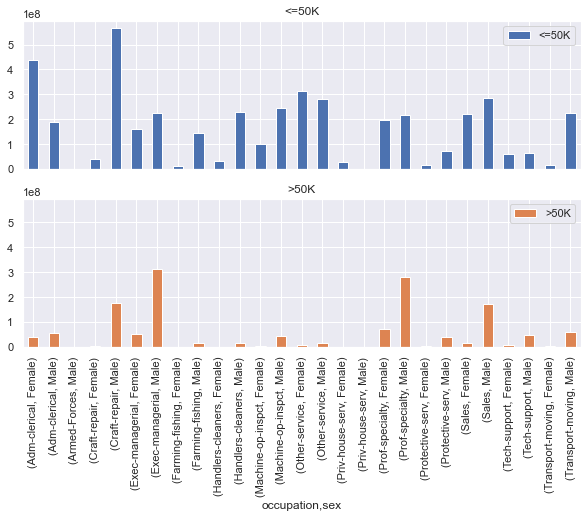

In [103]:
kpo = df.groupby(['occupation','sex','income'])['fnlwgt'].aggregate('sum').unstack()
kpo.plot(kind='bar',subplots=True,sharey='row');

There are clear differences between male and female proportion who are earnings more than 50k in the occupation like Executive managerial position, professional speciality and in sales.

Conclusion - Age, hours/week, qualification are the strong indicators which increases the chance of earning higher income level